<a href="https://colab.research.google.com/github/ymuto0302/RW2025/blob/main/holdout_cv_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# ホールドアウト法と交差検証法の比較
import numpy as np
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier

# データ読み込み
X, y = make_moons(n_samples=50, noise=0.2, random_state=12)

# ホールドアウト法による評価（データ分割結果が異なる）
from sklearn.model_selection import train_test_split
accuracies = []
for random_state in range(3):
    model_holdout = DecisionTreeClassifier(max_depth=3)

    # 異なる random_state 値でデータ分割
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_state)
    model_holdout.fit(X_train, y_train) # 学習
    acc = model_holdout.score(X_test, y_test) # 正解率を求める
    accuracies.append(acc) # 得られた正解率のストック

print("Holdout: %0.2f (+/- %0.2f)" % (np.mean(accuracies), np.std(accuracies) * 2))

# 5-Fold Cross-Validation による評価
from sklearn.model_selection import StratifiedKFold, cross_val_score
model_cv = DecisionTreeClassifier(max_depth=3)
# 3-fold CV の設定
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
# cross validation の実行
cross_val = cross_val_score(model_cv, X, y, cv=cv, scoring='accuracy')
print("Cross-Validation: %0.2f (+/- %0.2f)" % (cross_val.mean(), cross_val.std() * 2))

Holdout: 0.75 (+/- 0.29)
Cross-Validation: 0.92 (+/- 0.15)


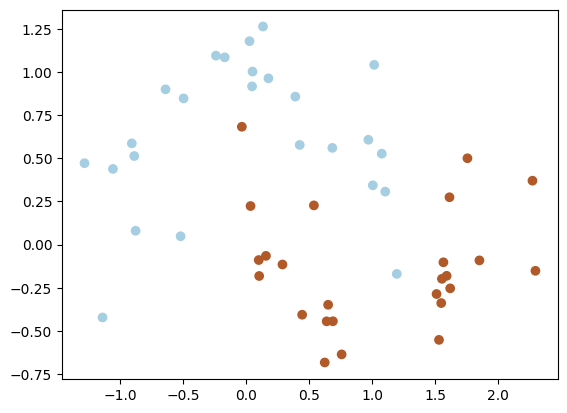

In [16]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.show()